In [9]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
# import seaborn as sns
import matplotlib.pyplot as plt

import json
import matplotlib

plt.rcParams['figure.figsize'] = [10, 5]

In [16]:
def getLegends(db):
    if db == "HouseA":
        return ['A0/A1', 'A2/A3', 'A4/A5']
    elif db == "CASAS":
        return [
            "R1_work_at_computer/R2_work_at_computer",
            "R1_sleep/R2_sleep",
            "R1_bed_to_toilet/R2_bed_to_toilet",
            "R2_prepare_dinner/R2_watch_TV",
            "R2_prepare_lunch/R1_work_at_dining_room_table",
        ]
    elif db == "PAMAP":
        return [
            'lying/sitting', 
            'standing/ironing', 
            'vacuum cleaning/ascending stairs', 
            'walking/descending stairs', 
            'cycling/running'
        ]
    elif db == "DSADS":
        return [
            "sitting/standing",
            "lying on back side/lying on right side",
            "ascending stairs/descending stairs",
            "exercising on a stepper/rowing",
            "jumping/playing basketball"
        ]
    else:
        raise Exception("Unknow DB")


In [67]:
def getData(db, model):
    fin = open("../../Results/"+db+"/plot_"+model+".json")
    c = fin.read()
    return json.loads(c)
    
def plotTaskLoss(values, legends):
    plt.rcParams['figure.figsize'] = [12, 5]
    plt.rcParams.update({'font.size': 15})
    
    ind = []
    acc = [[] for i in values[0]["acc"]]
    
    for v in values:
        ind.append(v["iter"])
        for i in range(len(acc)):
            acc[i].append(v["acc"][i])
            
    fig, ax = plt.subplots()
    
    patterns = [ "-s" , "-o" , "-x" , "-D" , "-+" , "-*", "-2" ]
    for i, v in enumerate(acc):
#         ax.errorbar(ind, v, fmt=patterns[i])
        ax.errorbar(ind, v)

    ax.set_title("Task Accuracy by epoch")
    ax.set_ylim([-0.1, 1.1])
    ax.set_xlabel("Iterations")
    ax.set_ylabel("Accuracy per task")
    ax.legend(legends, prop={'size': 10}, bbox_to_anchor=(1.05, 1), loc=0, borderaxespad=0.)
    
    fig.tight_layout()

    plt.show()

In [81]:


def plotGANLoss(values):
    plt.rcParams['figure.figsize'] = [9, 5]
    plt.rcParams.update({'font.size': 15})
    
    
    for m in values:
        ganLoss = values[m]
        
        ind = []
        loss = [[], []]
        
        for v in ganLoss:
            if v["iter"] %50 ==0:
                ind.append(v["iter"])
                loss[0].append(v["acc"]["d_cost"])
                loss[1].append(v["acc"]["g_cost"])
    #             loss[2].append(v["acc"]["W_dist"])

        fig, ax = plt.subplots()

    #     patterns = [ "-s" , "-o" , "-x" , "-D" , "-+" , "-*", "-2" ]
        for i, v in enumerate(loss):
    #         ax.errorbar(ind, v, fmt=patterns[i])
            ax.errorbar(ind, v)

        ax.set_title("Discriminator and Generator Losses \n with Training Epochs at Training Session #"+str((int(m)//2+1)))
        ax.set_ylim([-0.1, 5.1])
        ax.set_xlabel("Iterations")
        ax.set_ylabel("Training loss")

        legends = ["Discriminator",  "Generator"]
        ax.legend(legends, bbox_to_anchor=(0.95, 0.95), loc=1, borderaxespad=0.)

#         fig.tight_layout()

        plt.show()

# SG-CGAN

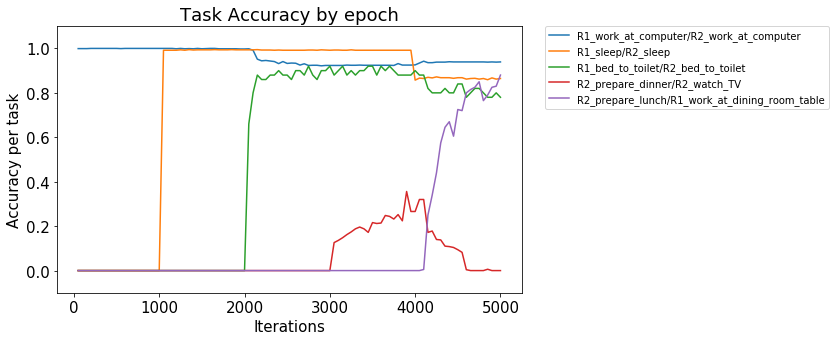

In [82]:
data = getData("CASAS", "sg-cgan")
legends = getLegends("CASAS")
plotTaskLoss(data["values"], legends)

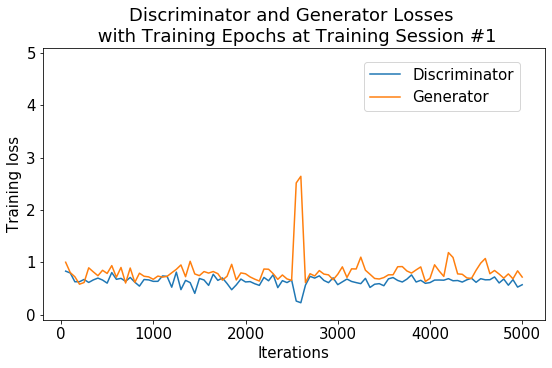

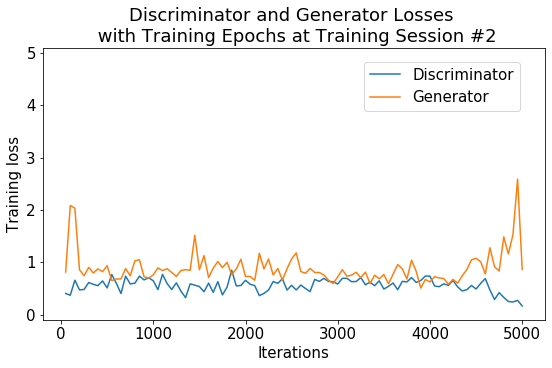

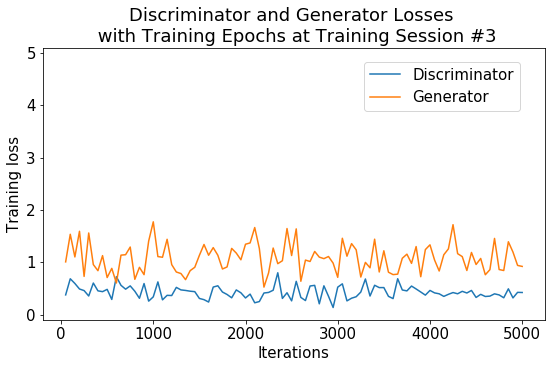

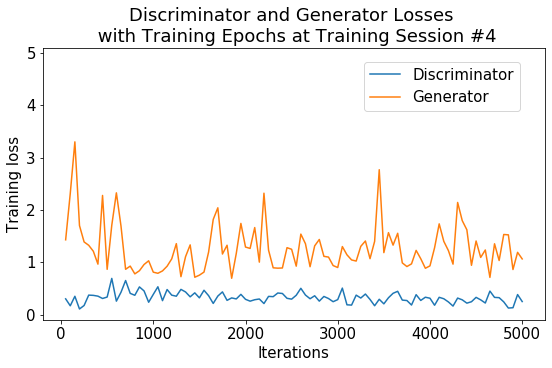

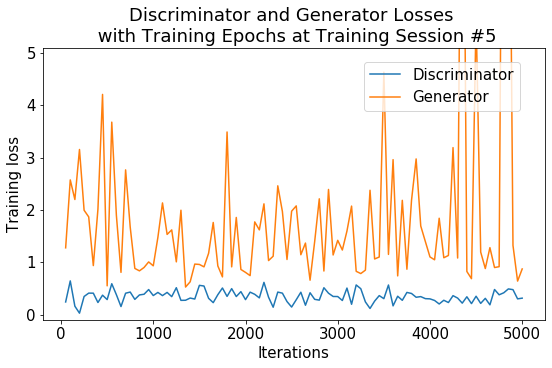

In [83]:
plotGANLoss(data["gan_loss"])

# SG-CWGAN

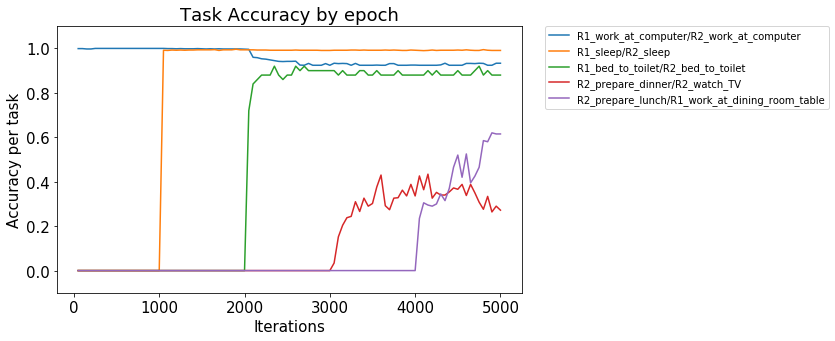

In [85]:
data = getData("CASAS", "mp-gan")
legends = getLegends("CASAS")
plotTaskLoss(data["values"], legends)

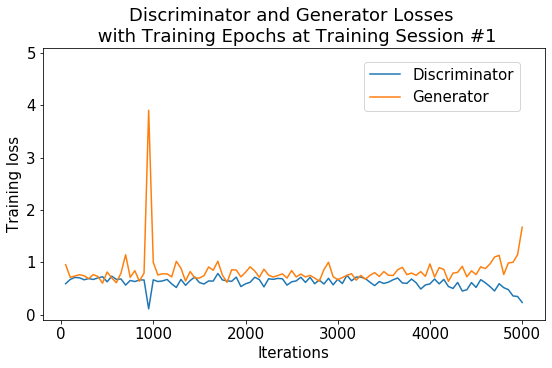

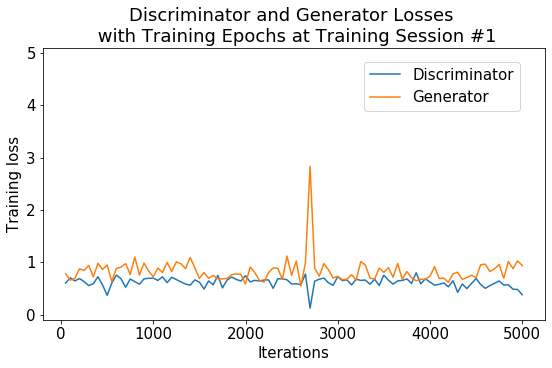

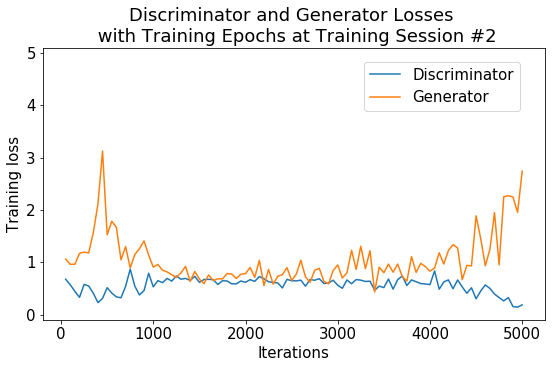

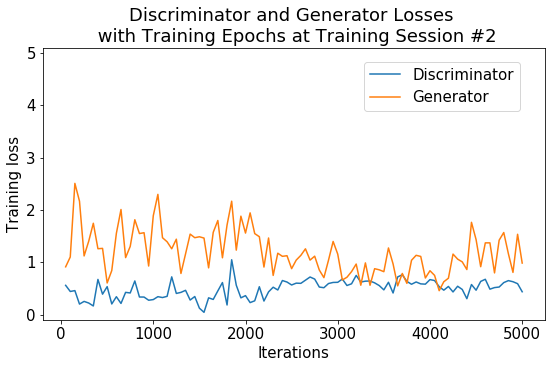

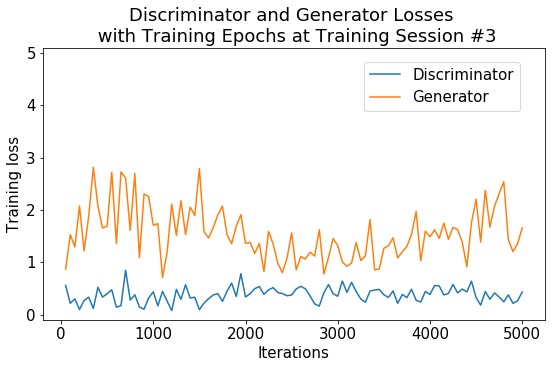

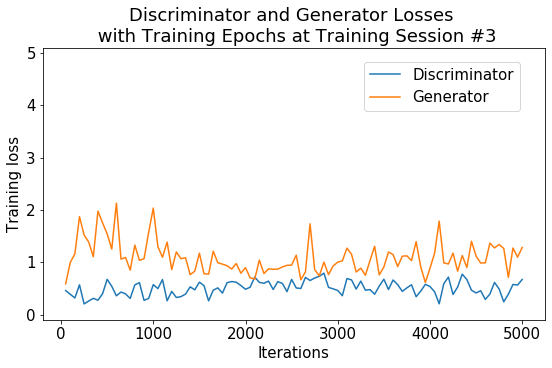

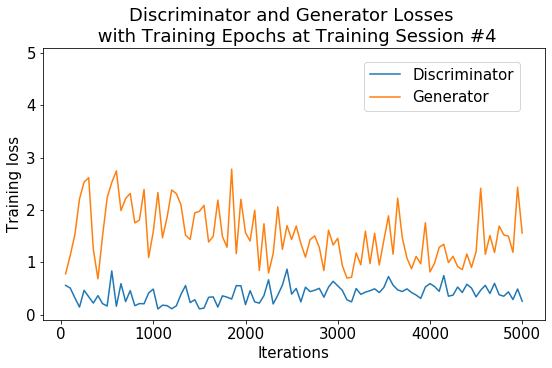

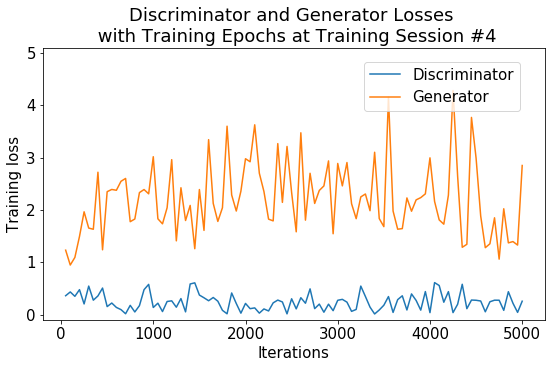

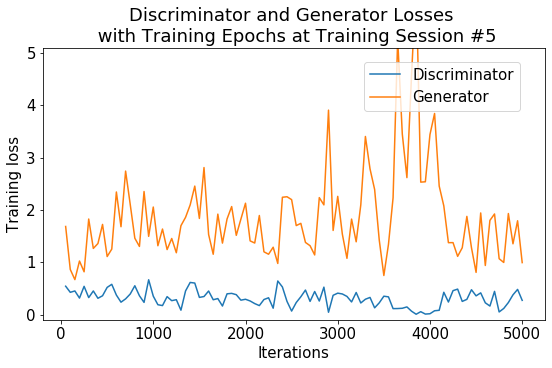

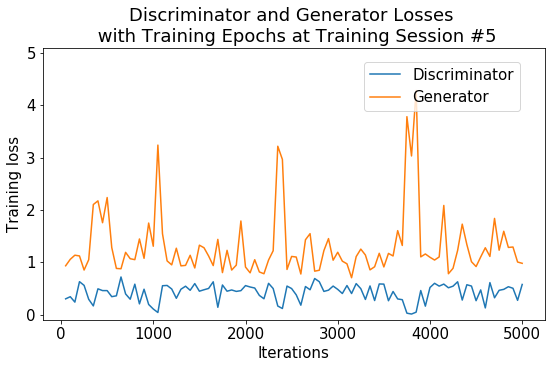

In [86]:
plotGANLoss(data["gan_loss"])